## Ventas vs fecha de expiración

In [8]:
import pandas as pd

# Rutas de los archivos
sales_file_path = './sales_test.csv'
products_file_path = './products.csv'
stock_file_path = './initial_stock.csv'

# Cargar los datasets
sales = pd.read_csv(sales_file_path)
products = pd.read_csv(products_file_path)
stock = pd.read_csv(stock_file_path)

# Mostrar información básica de cada dataset
print("Ventas:")
print(sales.info(), "\n")
print(sales.head(), "\n")

print("Productos:")
print(products.info(), "\n")
print(products.head(), "\n")

print("Stock:")
print(stock.info(), "\n")
print(stock.head())


Ventas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26089 entries, 0 to 26088
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   sale_id                   26089 non-null  int64  
 1   product_id                26089 non-null  int64  
 2   date                      26089 non-null  object 
 3   quantity                  26089 non-null  int64  
 4   total_price               26089 non-null  float64
 5   batch_expiry_date         26089 non-null  object 
 6   remaining_stock           26089 non-null  int64  
 7   warehouse_occupancy_rate  26089 non-null  float64
dtypes: float64(2), int64(4), object(2)
memory usage: 1.6+ MB
None 

   sale_id  product_id        date  quantity  total_price batch_expiry_date  \
0        1           5  2020-01-01         1        78.36        2025-04-01   
1        2           1  2020-01-01         1       149.16        2025-02-28   
2        3           2  2020

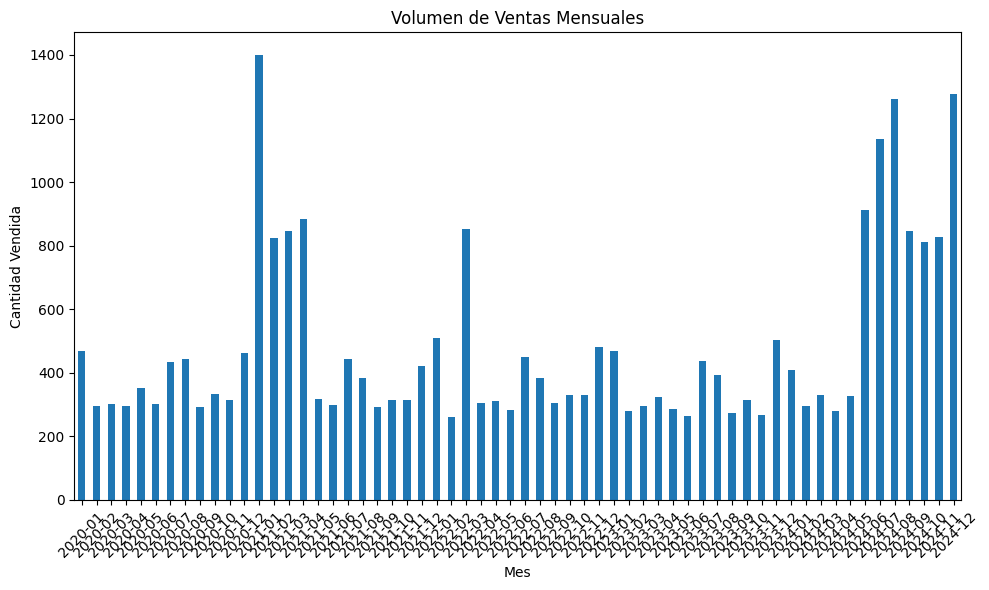

In [9]:
import matplotlib.pyplot as plt

# Asegurarnos de que la columna 'date' sea de tipo datetime
sales['date'] = pd.to_datetime(sales['date'])

# Calcular las ventas mensuales
monthly_sales = sales.groupby(sales['date'].dt.to_period('M'))['quantity'].sum()

# Crear la gráfica
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar')
plt.title('Volumen de Ventas Mensuales')
plt.xlabel('Mes')
plt.ylabel('Cantidad Vendida')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


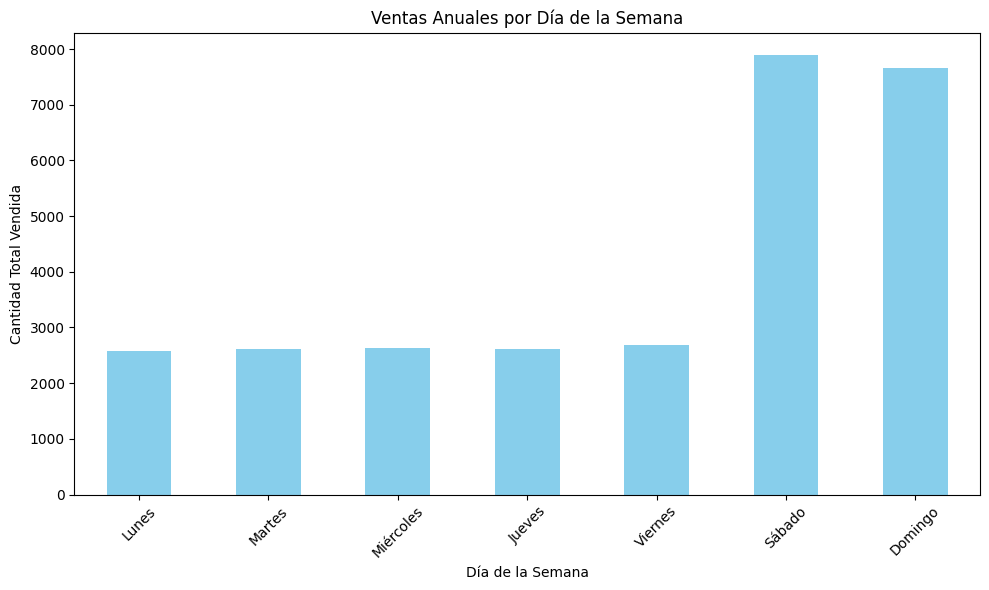

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Asegurarte de que la columna 'date' sea de tipo datetime
sales['date'] = pd.to_datetime(sales['date'])

# Crear una columna con el día de la semana (lunes=0, ..., domingo=6)
sales['weekday'] = sales['date'].dt.weekday

# Agrupar por día de la semana y sumar las ventas
sales_by_weekday = sales.groupby('weekday')['quantity'].sum()

# Cambiar los índices a nombres de los días
sales_by_weekday.index = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

# Crear el gráfico
plt.figure(figsize=(10, 6))
sales_by_weekday.plot(kind='bar', color='skyblue')
plt.title('Ventas Anuales por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Cantidad Total Vendida')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


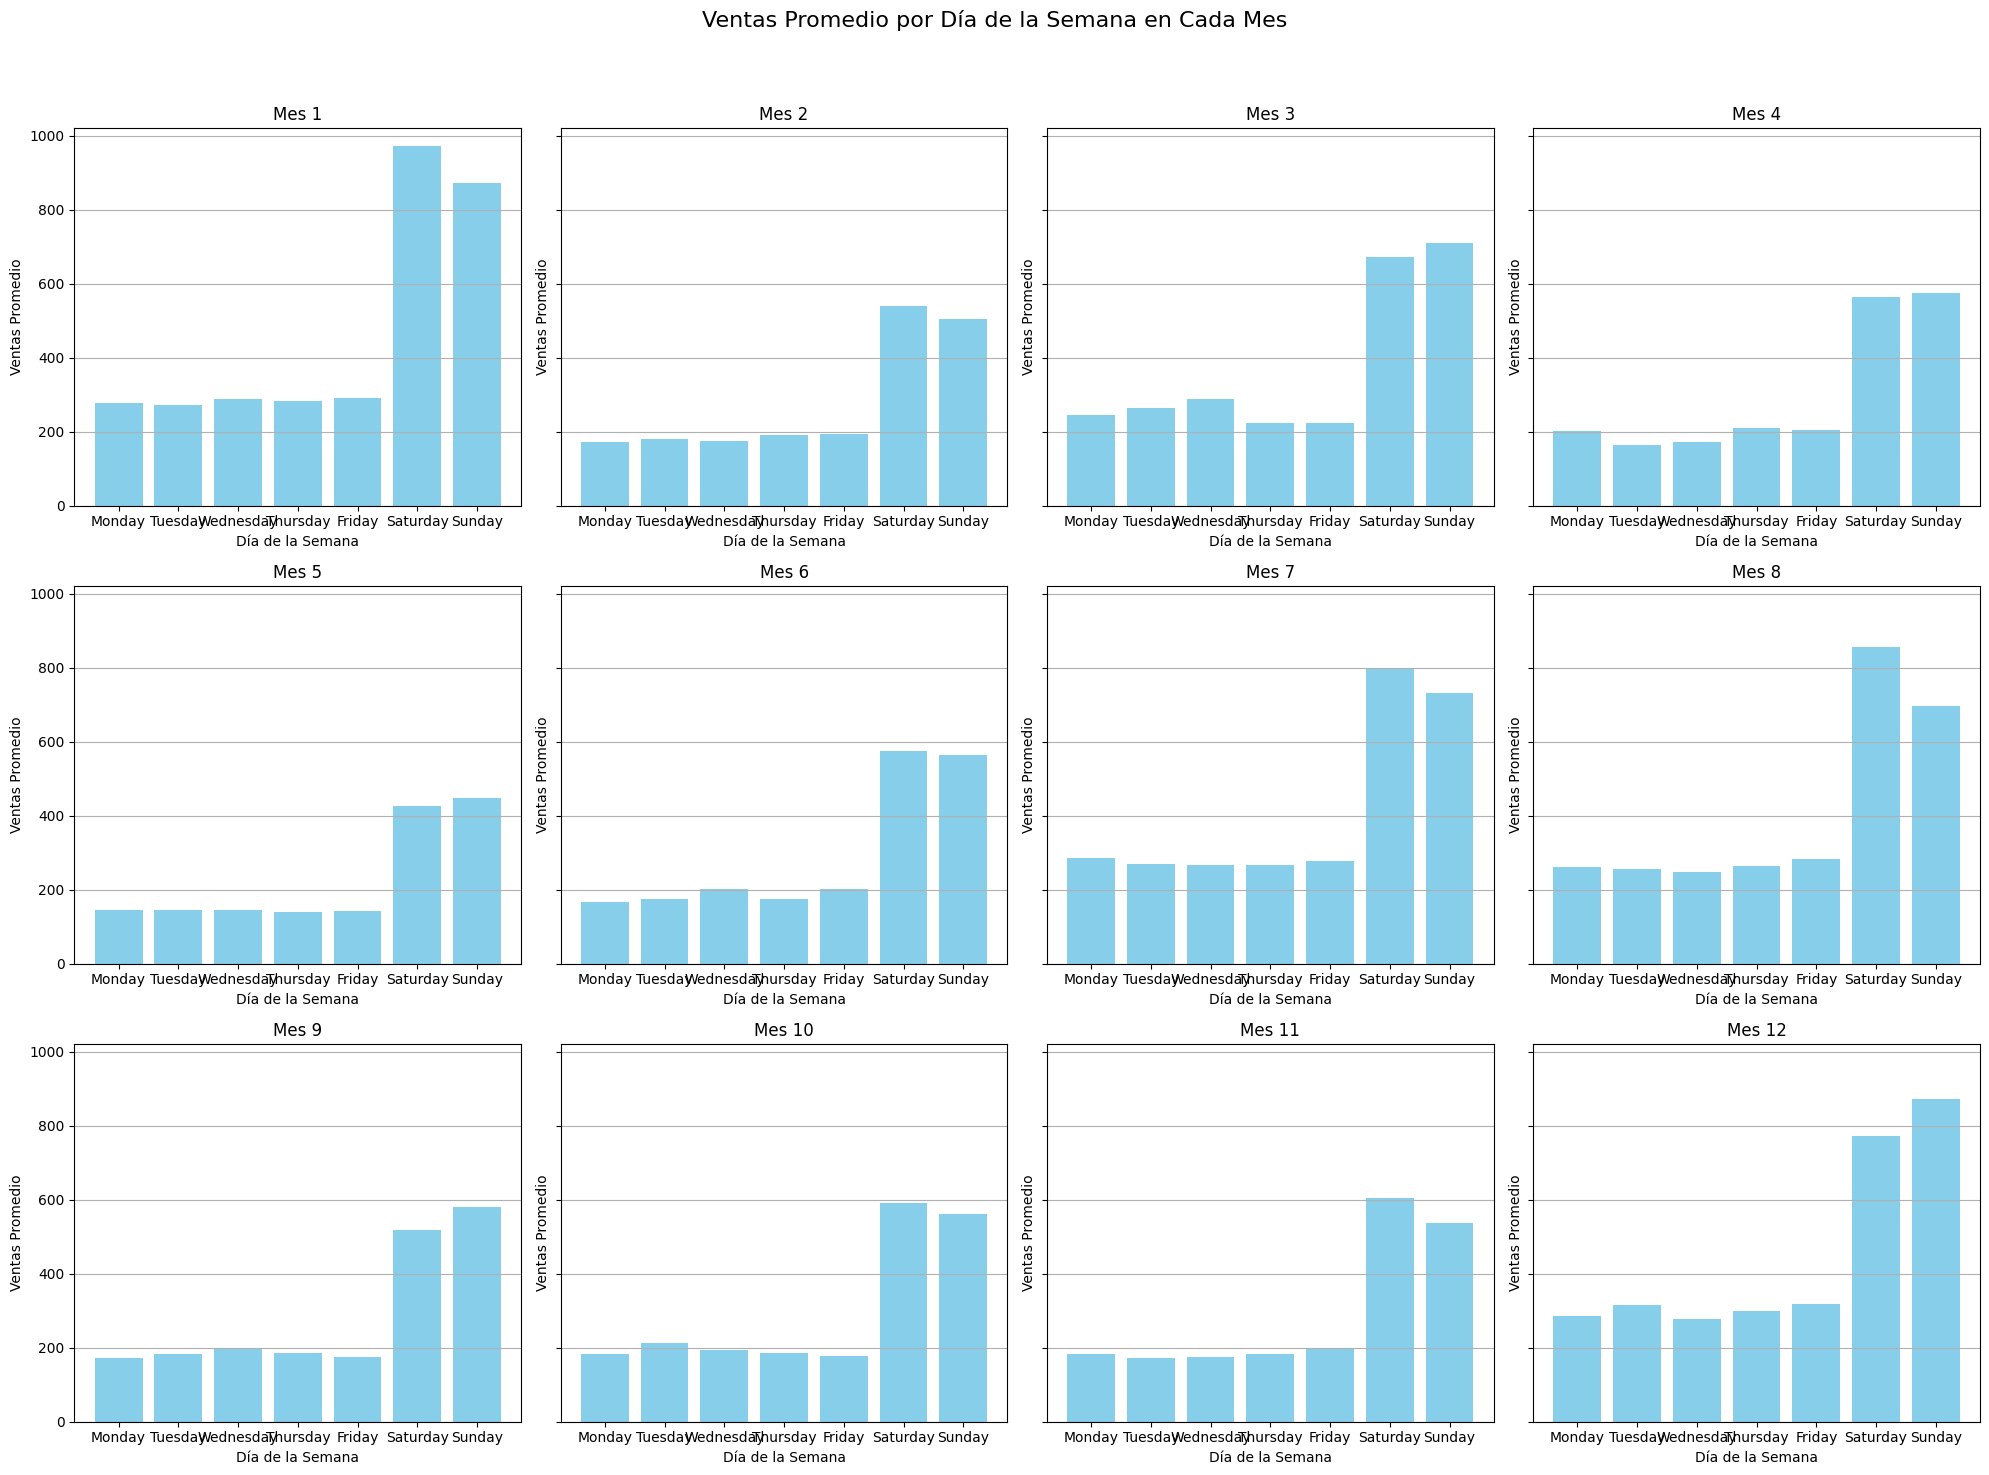

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
sales_data = pd.read_csv('sales_test.csv')
sales_data['date'] = pd.to_datetime(sales_data['date'])  # Convertir la fecha a formato datetime

# Agregar columnas para mes y día de la semana
sales_data['month'] = sales_data['date'].dt.month
sales_data['day_of_week'] = sales_data['date'].dt.day_name()

# Crear un DataFrame con las ventas promedio por día de la semana para cada mes
monthly_weekday_sales = sales_data.groupby(['month', 'day_of_week'])['quantity'].sum().reset_index()

# Ordenar los días de la semana en el orden correcto
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
monthly_weekday_sales['day_of_week'] = pd.Categorical(
    monthly_weekday_sales['day_of_week'], 
    categories=days_order, 
    ordered=True
)

# Ordenar los datos por mes y día de la semana
monthly_weekday_sales = monthly_weekday_sales.sort_values(['month', 'day_of_week'])

# Crear una figura con subplots para cada mes
fig, axes = plt.subplots(3, 4, figsize=(20, 15), sharey=True)
fig.suptitle('Ventas Promedio por Día de la Semana en Cada Mes', fontsize=16)

# Generar un gráfico para cada mes
for month in range(1, 13):
    ax = axes[(month-1)//4, (month-1)%4]
    month_data = monthly_weekday_sales[monthly_weekday_sales['month'] == month]
    ax.bar(month_data['day_of_week'], month_data['quantity'], color='skyblue')
    ax.set_title(f'Mes {month}')
    ax.set_xlabel('Día de la Semana')
    ax.set_ylabel('Ventas Promedio')
    ax.grid(axis='y')

# Ajustar el espacio entre subplots
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


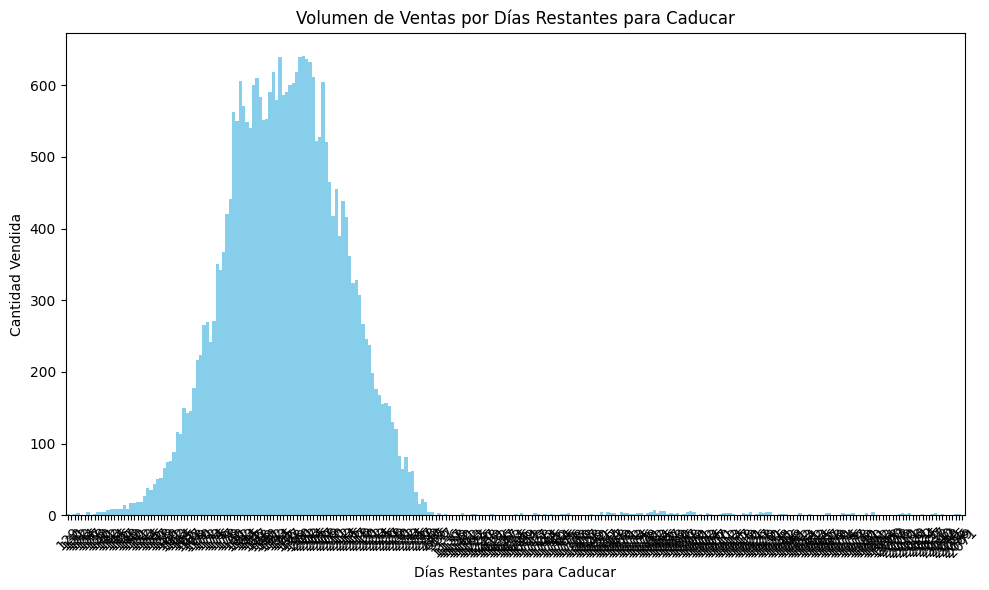

In [12]:
import matplotlib.pyplot as plt

# Asegurarnos de que las columnas de fechas sean de tipo datetime
sales['date'] = pd.to_datetime(sales['date'])
sales['batch_expiry_date'] = pd.to_datetime(sales['batch_expiry_date'])

# Calcular los días restantes para la caducidad
sales['days_to_expiry'] = (sales['batch_expiry_date'] - sales['date']).dt.days

# Agrupar por días restantes y sumar las ventas
sales_by_expiry = sales.groupby('days_to_expiry')['quantity'].sum()

# Crear el gráfico
plt.figure(figsize=(10, 6))
sales_by_expiry.plot(kind='bar', color='skyblue', width=1)
plt.title('Volumen de Ventas por Días Restantes para Caducar')
plt.xlabel('Días Restantes para Caducar')
plt.ylabel('Cantidad Vendida')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Classic Methods


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Renombrar la columna 'id' a 'product_id' en products
products.rename(columns={'id': 'product_id'}, inplace=True)

# Combinar los datos
data = pd.merge(sales, products, on='product_id', how='left')
data = pd.merge(data, stock, on='product_id', how='left')

# Crear características adicionales
data['Days to Expire'] = (pd.to_datetime(data['batch_expiry_date']) - pd.to_datetime(data['date'])).dt.days
data['Total Revenue'] = data['total_price']
data['Price_USD'] = data['Price_USD']
data['Remaining stock'] = data['remaining_stock']

# Seleccionar características y target
features = data[['Price_USD', 'remaining_stock', 'Days to Expire']]
target = data['total_price']

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Evaluar múltiples modelos
results = {}

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
results['Random Forest'] = {
    'MSE': mean_squared_error(y_test, y_pred_rf),
    'R2': r2_score(y_test, y_pred_rf)
}

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_test_scaled)
results['Linear Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_linear),
    'R2': r2_score(y_test, y_pred_linear)
}

# Polynomial Regression
degrees = range(1, 6)  # Testing degrees from 1 to 5
poly_results = {}

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)

    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)
    y_pred_poly = poly_model.predict(X_test_poly)

    poly_results[degree] = {
        'MSE': mean_squared_error(y_test, y_pred_poly),
        'R2': r2_score(y_test, y_pred_poly)
    }

# Find the best degree and add to results
best_degree = max(poly_results, key=lambda d: poly_results[d]['R2'])
results['Polynomial Regression (Best Degree)'] = {
    'Degree': best_degree,
    'MSE': poly_results[best_degree]['MSE'],
    'R2': poly_results[best_degree]['R2']
}

# Plotting Polynomial Regression Performance
mse_values = [metrics['MSE'] for metrics in poly_results.values()]
r2_values = [metrics['R2'] for metrics in poly_results.values()]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(degrees, mse_values, marker='o')
plt.title('MSE vs. Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(degrees, r2_values, marker='o', color='green')
plt.title('R² vs. Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('R²')
plt.grid()

plt.tight_layout()
plt.show()

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train_scaled, y_train)
y_pred_gb = gb_model.predict(X_test_scaled)
results['Gradient Boosting'] = {
    'MSE': mean_squared_error(y_test, y_pred_gb),
    'R2': r2_score(y_test, y_pred_gb)
}

# K-Nearest Neighbors Regressor
knn_model = KNeighborsRegressor()
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)
results['KNN Regressor'] = {
    'MSE': mean_squared_error(y_test, y_pred_knn),
    'R2': r2_score(y_test, y_pred_knn)
}

# Support Vector Regressor
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)
y_pred_svr = svr_model.predict(X_test_scaled)
results['Support Vector Regressor'] = {
    'MSE': mean_squared_error(y_test, y_pred_svr),
    'R2': r2_score(y_test, y_pred_svr)
}

# Neural Network
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='linear')
])

nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
nn_model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=50, batch_size=32, verbose=0)
nn_loss, nn_mae = nn_model.evaluate(X_test_scaled, y_test, verbose=0)
y_pred_nn = nn_model.predict(X_test_scaled).flatten()
results['Neural Network'] = {
    'MSE': mean_squared_error(y_test, y_pred_nn),
    'R2': r2_score(y_test, y_pred_nn),
    'MAE': nn_mae
}

# Output results
print('Model Performance Summary:')
for model, metrics in results.items():
    if 'Degree' in metrics:
        print(f"{model} (Degree {metrics['Degree']}): MSE={metrics['MSE']}, R2={metrics['R2']}")
    else:
        print(f"{model}: MSE={metrics['MSE']}, R2={metrics['R2']}")


/home/luiso/Desktop/code/reboot-academy/Proyecto_Final/AI_discount_recommendation_based_on_expiration_date/env/lib/python3.11/site-packages/numpy/_typing/_scalars.py:12: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  _BoolLike_co = Union[bool, np.bool]


AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

## Ahora medimos estos modelos a nivel SEMANAL

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Renombrar la columna 'id' a 'product_id' en products
products.rename(columns={'id': 'product_id'}, inplace=True)

# Combinar los datos
data = pd.merge(sales, products, on='product_id', how='left')
data = pd.merge(data, stock, on='product_id', how='left')

# Crear características adicionales
data['Days to Expire'] = (pd.to_datetime(data['batch_expiry_date']) - pd.to_datetime(data['date'])).dt.days
data['Total Revenue'] = data['total_price']
data['Price_USD'] = data['Price_USD']
data['Remaining stock'] = data['remaining_stock']

# Convertir la columna de fecha a tipo datetime si no lo está
data['date'] = pd.to_datetime(data['date'])

# Crear una columna adicional que represente la semana correspondiente
data['week'] = data['date'].dt.to_period('W').apply(lambda r: r.start_time)

# Agrupar los datos por semana
weekly_data = data.groupby('week').agg({
    'Price_USD': 'mean',            # Promedio de precios por semana
    'remaining_stock': 'mean',      # Promedio de stock restante por semana
    'Days to Expire': 'mean',       # Promedio de días para expirar por semana
    'total_price': 'sum'            # Suma total de ingresos por semana
}).reset_index()

# Seleccionar características y target
features = weekly_data[['Price_USD', 'remaining_stock', 'Days to Expire']]
target = weekly_data['total_price']

# Resultados
results = {}

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(features, target)
y_pred_rf = rf_model.predict(features)
results['Random Forest'] = {
    'MSE': mean_squared_error(target, y_pred_rf),
    'R2': r2_score(target, y_pred_rf)
}

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(features, target)
y_pred_linear = linear_model.predict(features)
results['Linear Regression'] = {
    'MSE': mean_squared_error(target, y_pred_linear),
    'R2': r2_score(target, y_pred_linear)
}

# Polynomial Regression
degrees = range(1, 6)
poly_results = {}

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    features_poly = poly.fit_transform(features)

    poly_model = LinearRegression()
    poly_model.fit(features_poly, target)
    y_pred_poly = poly_model.predict(features_poly)

    poly_results[degree] = {
        'MSE': mean_squared_error(target, y_pred_poly),
        'R2': r2_score(target, y_pred_poly)
    }

best_degree = max(poly_results, key=lambda d: poly_results[d]['R2'])
results['Polynomial Regression (Best Degree)'] = {
    'Degree': best_degree,
    'MSE': poly_results[best_degree]['MSE'],
    'R2': poly_results[best_degree]['R2']
}

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(features, target)
y_pred_gb = gb_model.predict(features)
results['Gradient Boosting'] = {
    'MSE': mean_squared_error(target, y_pred_gb),
    'R2': r2_score(target, y_pred_gb)
}

# K-Nearest Neighbors Regressor
knn_model = KNeighborsRegressor()
knn_model.fit(features, target)
y_pred_knn = knn_model.predict(features)
results['KNN Regressor'] = {
    'MSE': mean_squared_error(target, y_pred_knn),
    'R2': r2_score(target, y_pred_knn)
}

# Support Vector Regressor
svr_model = SVR()
svr_model.fit(features, target)
y_pred_svr = svr_model.predict(features)
results['Support Vector Regressor'] = {
    'MSE': mean_squared_error(target, y_pred_svr),
    'R2': r2_score(target, y_pred_svr)
}

# Neural Network
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(features.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='linear')
])

nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
nn_model.fit(features, target, epochs=50, batch_size=32, verbose=0)
y_pred_nn = nn_model.predict(features).flatten()
results['Neural Network'] = {
    'MSE': mean_squared_error(target, y_pred_nn),
    'R2': r2_score(target, y_pred_nn)
}

# Mostrar los resultados finales
print('Resumen del Rendimiento del Modelo:')
for model, metrics in results.items():
    if 'Degree' in metrics:
        print(f"{model} (Degree {metrics['Degree']}): MSE={metrics['MSE']}, R2={metrics['R2']}")
    else:
        print(f"{model}: MSE={metrics['MSE']}, R2={metrics['R2']}")


/home/rebooter/code/Final_Proyect/script_datos_sintéticos_ira/AI_discount_recommendation_based_on_expiration_date/env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Resumen del Rendimiento del Modelo:
Random Forest: MSE=759180.8394898991, R2=0.8733263999190151
Linear Regression: MSE=5431635.656446714, R2=0.0937009904087499
Polynomial Regression (Best Degree) (Degree 4): MSE=4312961.750877987, R2=0.2803580338481766
Gradient Boosting: MSE=1201471.4474809952, R2=0.7995277202343636
KNN Regressor: MSE=3648385.607851038, R2=0.3912463073479706
Support Vector Regressor: MSE=6266942.619246763, R2=-0.04567468221977866
Neural Network: MSE=12689001.166826338, R2=-1.1172313309615571


## Ahora MENSUAL

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Renombrar la columna 'id' a 'product_id' en products
products.rename(columns={'id': 'product_id'}, inplace=True)

# Combinar los datos
data = pd.merge(sales, products, on='product_id', how='left')
data = pd.merge(data, stock, on='product_id', how='left')

# Crear características adicionales
data['Days to Expire'] = (pd.to_datetime(data['batch_expiry_date']) - pd.to_datetime(data['date'])).dt.days
data['Total Revenue'] = data['total_price']
data['Price_USD'] = data['Price_USD']
data['Remaining stock'] = data['remaining_stock']

# Convertir la columna de fecha a tipo datetime si no lo está
data['date'] = pd.to_datetime(data['date'])

# Crear una columna adicional que represente los períodos de 30 días
data['period_30d'] = (data['date'] - data['date'].min()).dt.days // 30

# Agrupar los datos por períodos de 30 días
monthly_data = data.groupby('period_30d').agg({
    'Price_USD': 'mean',            # Promedio de precios por período
    'remaining_stock': 'mean',      # Promedio de stock restante por período
    'Days to Expire': 'mean',       # Promedio de días para expirar por período
    'total_price': 'sum'            # Suma total de ingresos por período
}).reset_index()

# Seleccionar características y target
features = monthly_data[['Price_USD', 'remaining_stock', 'Days to Expire']]
target = monthly_data['total_price']

# Resultados
results = {}

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(features, target)
y_pred_rf = rf_model.predict(features)
results['Random Forest'] = {
    'MSE': mean_squared_error(target, y_pred_rf),
    'R2': r2_score(target, y_pred_rf)
}

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(features, target)
y_pred_linear = linear_model.predict(features)
results['Linear Regression'] = {
    'MSE': mean_squared_error(target, y_pred_linear),
    'R2': r2_score(target, y_pred_linear)
}

# Polynomial Regression
degrees = range(1, 6)
poly_results = {}

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    features_poly = poly.fit_transform(features)

    poly_model = LinearRegression()
    poly_model.fit(features_poly, target)
    y_pred_poly = poly_model.predict(features_poly)

    poly_results[degree] = {
        'MSE': mean_squared_error(target, y_pred_poly),
        'R2': r2_score(target, y_pred_poly)
    }

best_degree = max(poly_results, key=lambda d: poly_results[d]['R2'])
results['Polynomial Regression (Best Degree)'] = {
    'Degree': best_degree,
    'MSE': poly_results[best_degree]['MSE'],
    'R2': poly_results[best_degree]['R2']
}

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(features, target)
y_pred_gb = gb_model.predict(features)
results['Gradient Boosting'] = {
    'MSE': mean_squared_error(target, y_pred_gb),
    'R2': r2_score(target, y_pred_gb)
}

# K-Nearest Neighbors Regressor
knn_model = KNeighborsRegressor()
knn_model.fit(features, target)
y_pred_knn = knn_model.predict(features)
results['KNN Regressor'] = {
    'MSE': mean_squared_error(target, y_pred_knn),
    'R2': r2_score(target, y_pred_knn)
}

# Support Vector Regressor
svr_model = SVR()
svr_model.fit(features, target)
y_pred_svr = svr_model.predict(features)
results['Support Vector Regressor'] = {
    'MSE': mean_squared_error(target, y_pred_svr),
    'R2': r2_score(target, y_pred_svr)
}

# Neural Network
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(features.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='linear')
])

nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
nn_model.fit(features, target, epochs=50, batch_size=32, verbose=0)
y_pred_nn = nn_model.predict(features).flatten()
results['Neural Network'] = {
    'MSE': mean_squared_error(target, y_pred_nn),
    'R2': r2_score(target, y_pred_nn)
}

# Mostrar los resultados finales
print('Resumen del Rendimiento del Modelo:')
for model, metrics in results.items():
    if 'Degree' in metrics:
        print(f"{model} (Degree {metrics['Degree']}): MSE={metrics['MSE']}, R2={metrics['R2']}")
    else:
        print(f"{model}: MSE={metrics['MSE']}, R2={metrics['R2']}")


/home/rebooter/code/Final_Proyect/script_datos_sintéticos_ira/AI_discount_recommendation_based_on_expiration_date/env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Resumen del Rendimiento del Modelo:
Random Forest: MSE=7379113.4920487795, R2=0.8686124329247205
Linear Regression: MSE=33151693.446857776, R2=0.4097230851508715
Polynomial Regression (Best Degree) (Degree 4): MSE=16156253.26239055, R2=0.7123325435386174
Gradient Boosting: MSE=927935.207419988, R2=0.9834778053708242
KNN Regressor: MSE=30704314.962793905, R2=0.45329947208136434
Support Vector Regressor: MSE=59859797.1001333, R2=-0.0658235728561416
Neural Network: MSE=1647999389.5890436, R2=-28.34317659878308


## Prophet


   sale_id  product_id       date  quantity  total_price batch_expiry_date  \
0        1           1 2020-01-01         1       149.16        2025-02-28   
1        2          14 2020-01-01         1        11.44        2025-03-05   
2        3           6 2020-01-01         1       102.88        2025-02-17   
3        4          22 2020-01-01         1        31.52        2025-07-04   
4        5          10 2020-01-01         1       136.35        2025-04-15   

   remaining_stock  warehouse_occupancy_rate  weekday  days_to_expiry  
0               30                      85.4        2            1885  
1                6                      85.2        2            1890  
2               21                      85.0        2            1874  
3                3                      84.8        2            2011  
4                9                      84.6        2            1931  
          ds  y
0 2020-01-01  1
1 2020-01-01  1
2 2020-01-01  1
3 2020-01-01  1
4 2020-01-01  1


/home/rebooter/code/Final_Proyect/script_datos_sintéticos_ira/AI_discount_recommendation_based_on_expiration_date/env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
16:21:43 - cmdstanpy - INFO - Chain [1] start processing
16:21:43 - cmdstanpy - INFO - Chain [1] done processing


             ds      yhat  yhat_lower  yhat_upper
1850 2025-01-24  1.119890    0.726997    1.502344
1851 2025-01-25  1.121210    0.750689    1.492200
1852 2025-01-26  1.122264    0.766923    1.520541
1853 2025-01-27  1.123022    0.766197    1.504028
1854 2025-01-28  1.123463    0.733253    1.488458


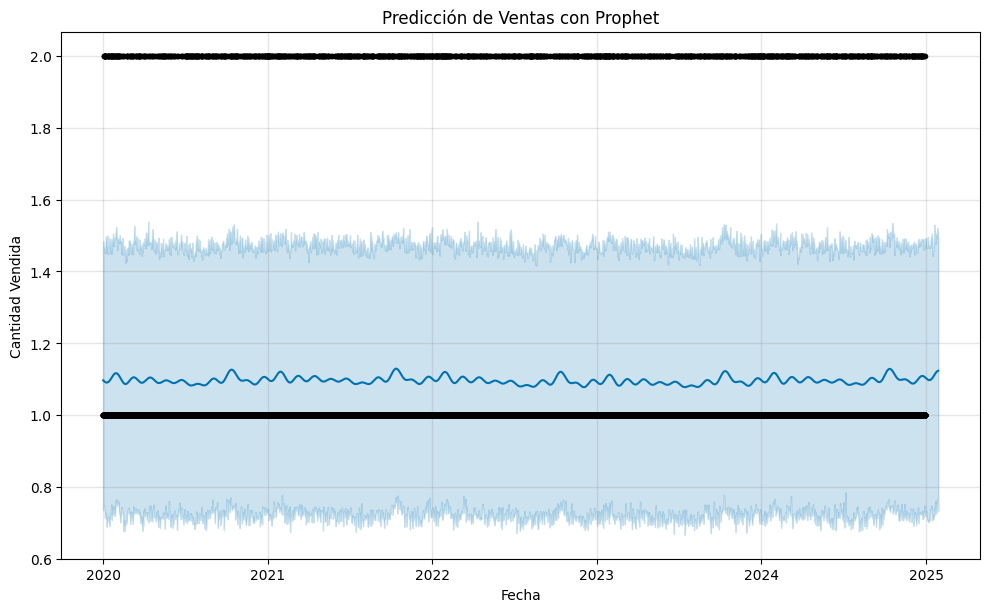

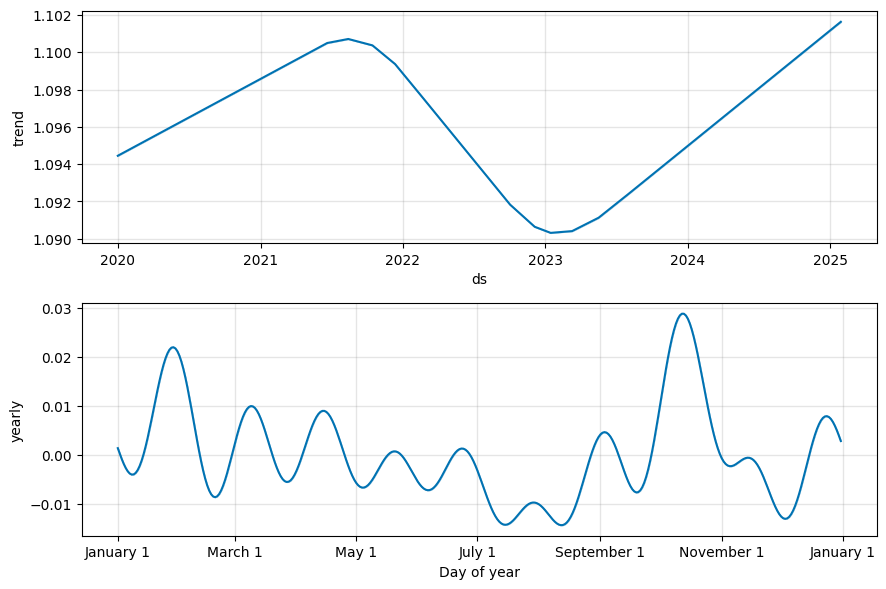

Evaluación del Modelo:
Mean Squared Error (MSE): 0.06504130828088406
R-Squared (R²): -0.04530674022849368


In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# === Paso 1: Cargar Datos ===
# Revisar las columnas y asegurarnos de que tienen el formato correcto
print(sales.head())

# === Paso 2: Preparar Datos ===
# Prophet requiere columnas específicas: 'ds' (fecha) y 'y' (variable objetivo)
# Asumimos que 'date' contiene las fechas y 'quantity' las ventas
df = sales[['date', 'quantity']].rename(columns={'date': 'ds', 'quantity': 'y'})
df['ds'] = pd.to_datetime(df['ds'])  # Asegurarnos de que las fechas estén en formato datetime

# Verificar que los datos estén listos
print(df.head())

# === Paso 3: Dividir los Datos (Entrenamiento y Prueba) ===
# Usaremos los últimos 30 días como prueba, el resto para entrenamiento
train = df.iloc[:-30]  # Datos históricos menos los últimos 30 días
test = df.iloc[-30:]   # Los últimos 30 días

# === Paso 4: Crear y Entrenar el Modelo Prophet ===
# Crear una nueva instancia de Prophet para el modelo
model = Prophet(weekly_seasonality=False)

# Ajustar el modelo a los datos de entrenamiento
model.fit(train)

# === Paso 5: Generar Predicciones ===
# Crear un DataFrame para predicciones futuras (30 días adicionales)
future = model.make_future_dataframe(periods=30)  # Generar las fechas futuras
forecast = model.predict(future)  # Predecir

# Mostrar las predicciones generadas
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# === Paso 6: Visualizar Resultados ===
# Gráfico de predicciones
model.plot(forecast)
plt.title('Predicción de Ventas con Prophet')
plt.xlabel('Fecha')
plt.ylabel('Cantidad Vendida')
plt.show()

# Gráfico de componentes (tendencia y estacionalidad)
model.plot_components(forecast)
plt.show()

# === Paso 7: Evaluar el Modelo ===
# Extraer predicciones correspondientes a las fechas de prueba
test_forecast = forecast[-30:]  # Últimos 30 días predichos
y_true = test['y'].values       # Valores reales
y_pred = test_forecast['yhat'].values  # Predicciones de Prophet

# Calcular métricas de evaluación
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"Evaluación del Modelo:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-Squared (R²): {r2}")


16:21:44 - cmdstanpy - INFO - Chain [1] start processing
16:21:44 - cmdstanpy - INFO - Chain [1] done processing


Evaluación del Modelo:
Mean Squared Error (MSE): 2316.4508170590993
R-Squared (R²): -0.893782283631168


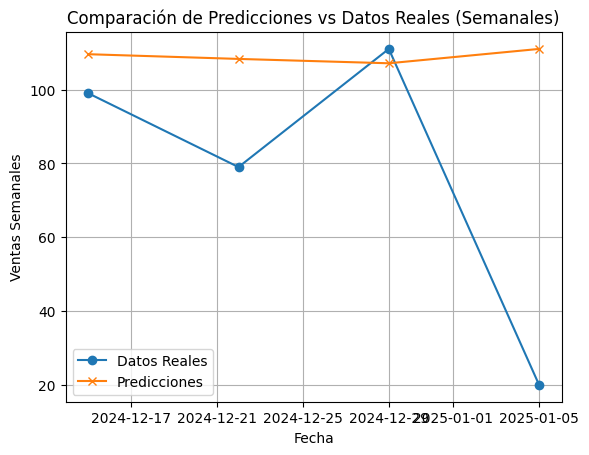

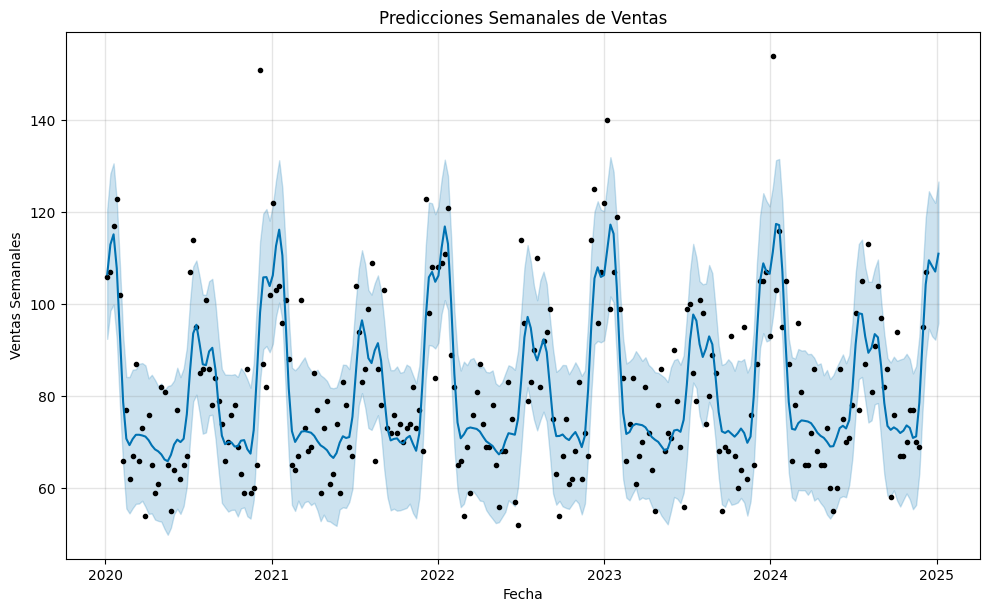

In [ ]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# === Paso 1: Cargar Datos ===
sales_data = pd.read_csv('sales_test.csv')

# Renombrar la columna de fechas (si es necesario)
sales_data.rename(columns={'date': 'ds'}, inplace=True)

# Renombrar la columna de ventas (si es necesario)
if 'quantity' in sales_data.columns:
    sales_data.rename(columns={'quantity': 'y'}, inplace=True)

# Convertir la columna 'ds' a formato datetime
sales_data['ds'] = pd.to_datetime(sales_data['ds'])

# === Paso 2: Agrupar los Datos Semanalmente ===
weekly_sales = sales_data.resample('W', on='ds').sum().reset_index()

# Eliminar filas con valores nulos en 'y'
weekly_sales = weekly_sales.dropna(subset=['y'])

# === Paso 3: Dividir Datos en Entrenamiento y Prueba ===
# Usar las últimas 4 semanas como datos de prueba
train = weekly_sales.iloc[:-4]
test = weekly_sales.iloc[-4:]

# === Paso 4: Preparar y Entrenar Prophet ===
model = Prophet()
model.fit(train)

# === Paso 5: Generar Predicciones ===
future = model.make_future_dataframe(periods=4, freq='W')  # Predicciones para 4 semanas
forecast = model.predict(future)

# === Paso 6: Evaluar el Modelo ===
# Extraer las predicciones correspondientes al período de prueba
y_pred = forecast[['ds', 'yhat']].iloc[-4:]  # Predicciones de las últimas 4 semanas
y_true = test[['ds', 'y']].set_index('ds')  # Valores reales del período de prueba

# Comparar predicciones y valores reales
y_pred.set_index('ds', inplace=True)
y_pred = y_pred.reindex(y_true.index)

# Calcular métricas de evaluación
mse = mean_squared_error(y_true['y'], y_pred['yhat'])
r2 = r2_score(y_true['y'], y_pred['yhat'])

# Mostrar métricas de evaluación
print(f"Evaluación del Modelo:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-Squared (R²): {r2}")

# === Paso 7: Visualizar Resultados ===
# Gráfico de predicciones y valores reales
plt.plot(y_true.index, y_true['y'], label='Datos Reales', marker='o')
plt.plot(y_pred.index, y_pred['yhat'], label='Predicciones', marker='x')
plt.title('Comparación de Predicciones vs Datos Reales (Semanales)')
plt.xlabel('Fecha')
plt.ylabel('Ventas Semanales')
plt.legend()
plt.grid()
plt.show()

# Visualizar las predicciones completas
model.plot(forecast)
plt.title('Predicciones Semanales de Ventas')
plt.xlabel('Fecha')
plt.ylabel('Ventas Semanales')
plt.show()


16:21:44 - cmdstanpy - INFO - Chain [1] start processing
16:21:44 - cmdstanpy - INFO - Chain [1] done processing


Evaluación del Modelo:
Mean Squared Error (MSE): 29.133907959023208
R-Squared (R²): 0.9939990577280357


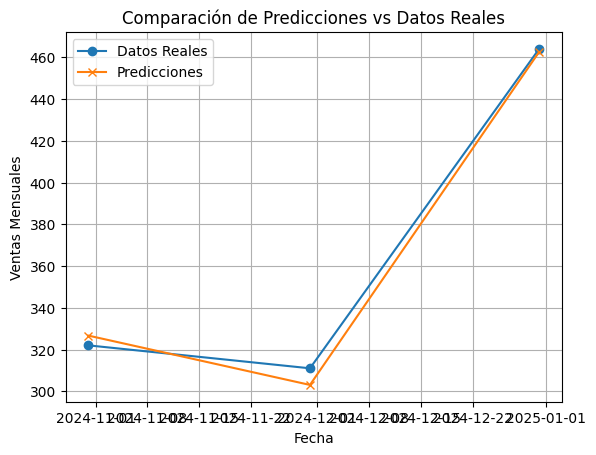

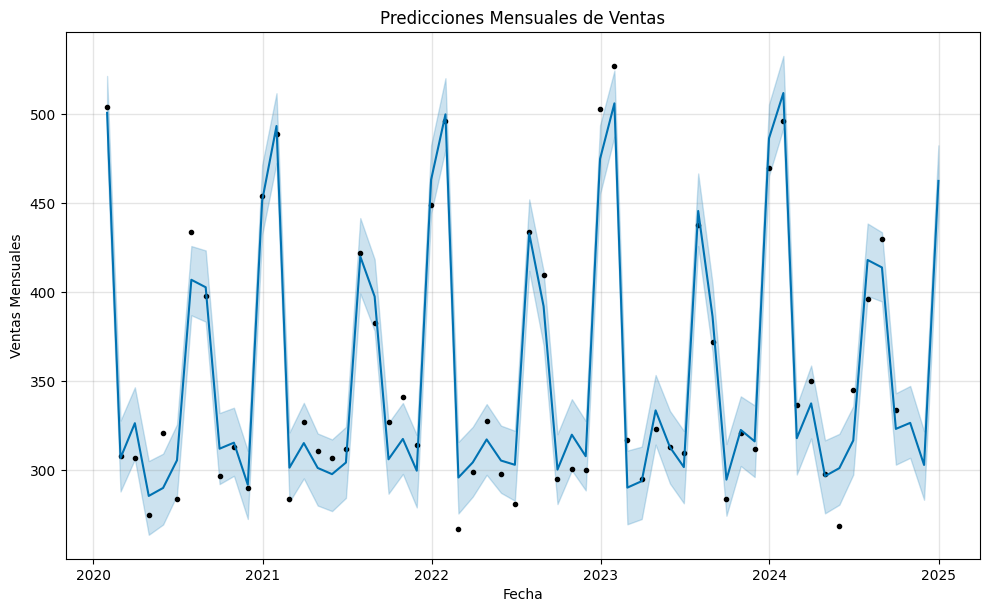

In [ ]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# === Paso 1: Cargar Datos ===
sales_data = pd.read_csv('sales_test.csv')

# Renombrar la columna de fechas (si es necesario)
sales_data.rename(columns={'date': 'ds'}, inplace=True)

# Renombrar la columna de ventas (si es necesario)
if 'quantity' in sales_data.columns:
    sales_data.rename(columns={'quantity': 'y'}, inplace=True)

# Convertir la columna 'ds' a formato datetime
sales_data['ds'] = pd.to_datetime(sales_data['ds'])

# === Paso 2: Agrupar los Datos Mensualmente ===
monthly_sales = sales_data.resample('M', on='ds').sum().reset_index()

# Renombrar la columna de ventas a 'y' si es necesario
if 'quantity' in monthly_sales.columns:
    monthly_sales.rename(columns={'quantity': 'y'}, inplace=True)

# Eliminar filas con valores nulos en 'y'
monthly_sales = monthly_sales.dropna(subset=['y'])

# === Paso 3: Dividir Datos en Entrenamiento y Prueba ===
# Usar los últimos 3 meses como datos de prueba
train = monthly_sales.iloc[:-3]
test = monthly_sales.iloc[-3:]

# === Paso 4: Preparar y Entrenar Prophet ===
model = Prophet()
model.fit(train)

# === Paso 5: Generar Predicciones ===
future = model.make_future_dataframe(periods=3, freq='M')  # Predicciones para 3 meses
forecast = model.predict(future)

# === Paso 6: Evaluar el Modelo ===
# Extraer las predicciones correspondientes al período de prueba
y_pred = forecast[['ds', 'yhat']].iloc[-3:]  # Predicciones de los últimos 3 meses
y_true = test[['ds', 'y']].set_index('ds')  # Valores reales del período de prueba

# Comparar predicciones y valores reales
y_pred.set_index('ds', inplace=True)
y_pred = y_pred.reindex(y_true.index)

# Calcular métricas de evaluación
mse = mean_squared_error(y_true['y'], y_pred['yhat'])
r2 = r2_score(y_true['y'], y_pred['yhat'])

# Mostrar métricas de evaluación
print(f"Evaluación del Modelo:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-Squared (R²): {r2}")

# === Paso 7: Visualizar Resultados ===
# Gráfico de predicciones y valores reales
plt.plot(y_true.index, y_true['y'], label='Datos Reales', marker='o')
plt.plot(y_pred.index, y_pred['yhat'], label='Predicciones', marker='x')
plt.title('Comparación de Predicciones vs Datos Reales')
plt.xlabel('Fecha')
plt.ylabel('Ventas Mensuales')
plt.legend()
plt.grid()
plt.show()

# Visualizar las predicciones completas
model.plot(forecast)
plt.title('Predicciones Mensuales de Ventas')
plt.xlabel('Fecha')
plt.ylabel('Ventas Mensuales')
plt.show()


16:21:44 - cmdstanpy - INFO - Chain [1] start processing
16:21:44 - cmdstanpy - INFO - Chain [1] done processing


Procesando producto: 3 (Alta Rotación)


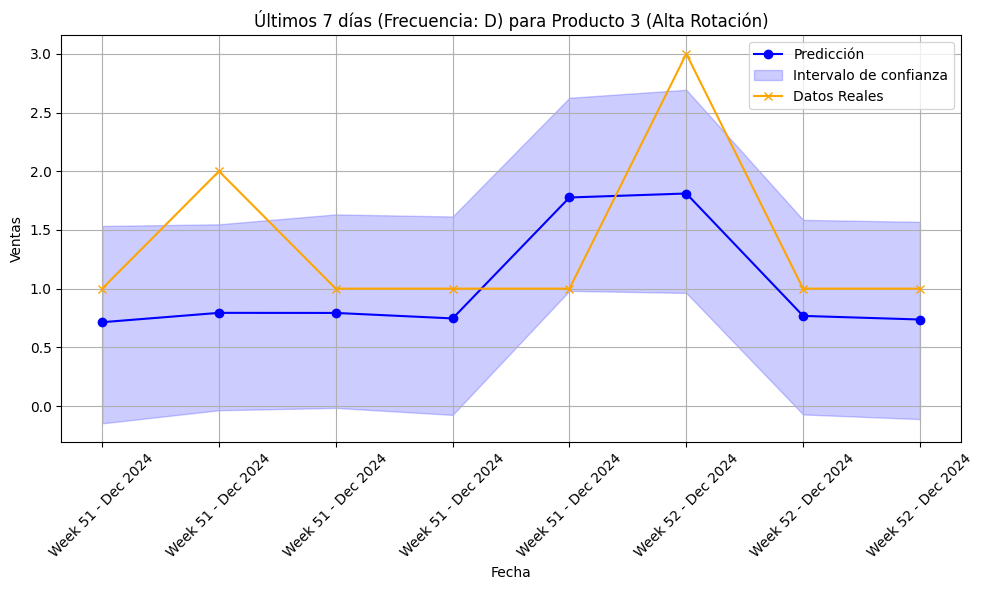

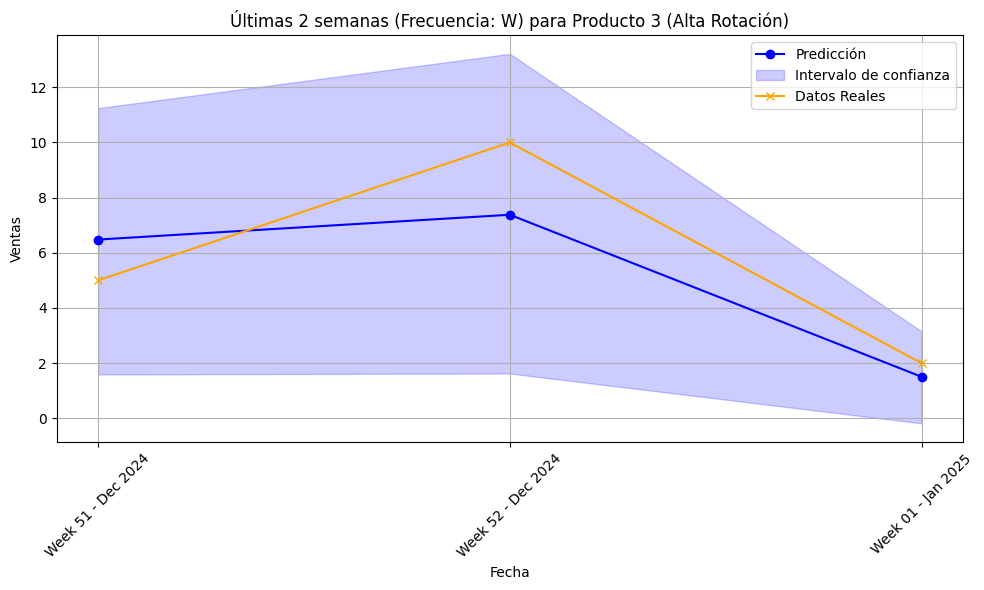

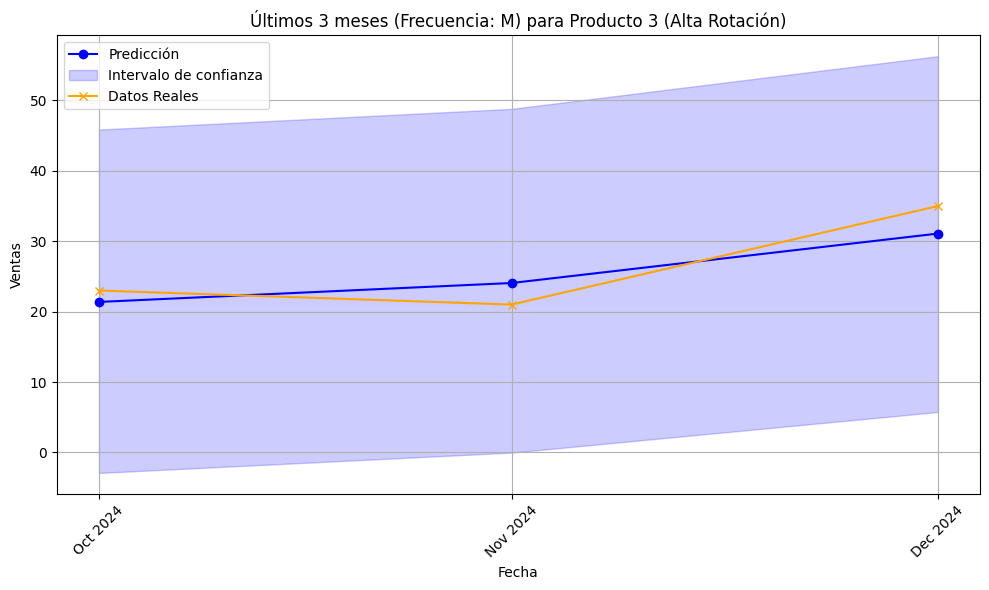

16:21:45 - cmdstanpy - INFO - Chain [1] start processing
16:21:45 - cmdstanpy - INFO - Chain [1] done processing


Procesando producto: 11 (Media Rotación)


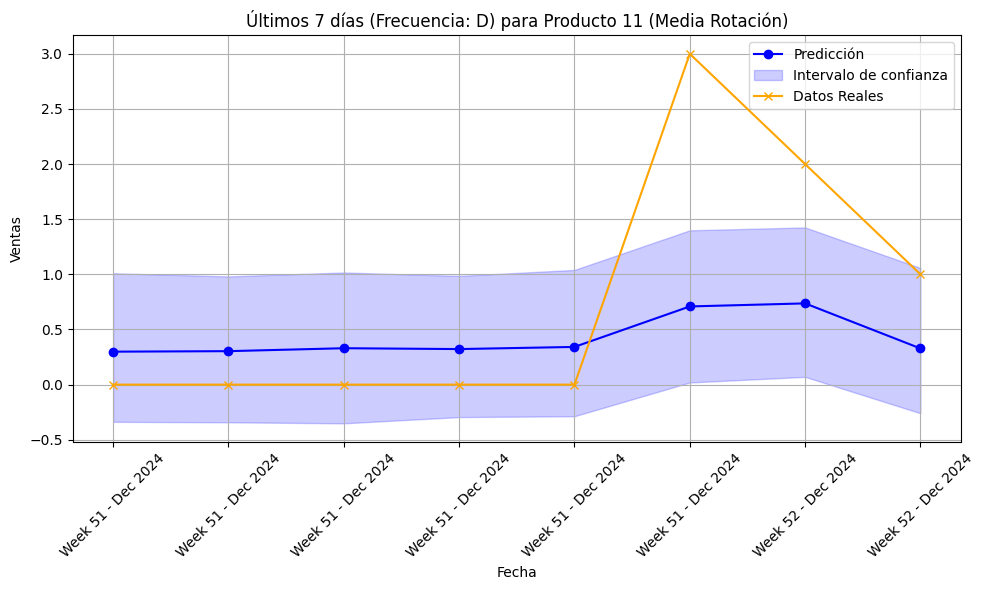

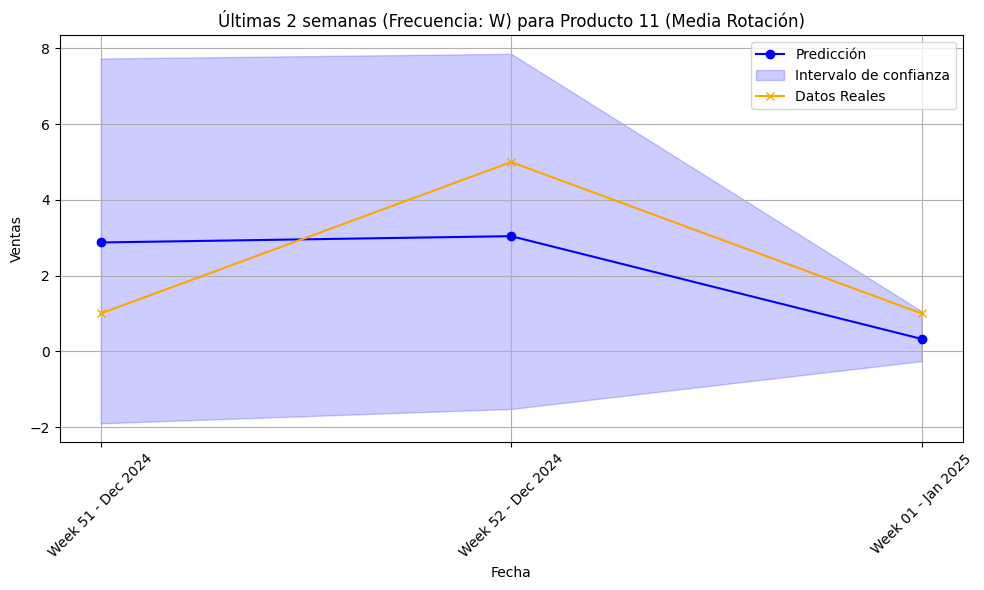

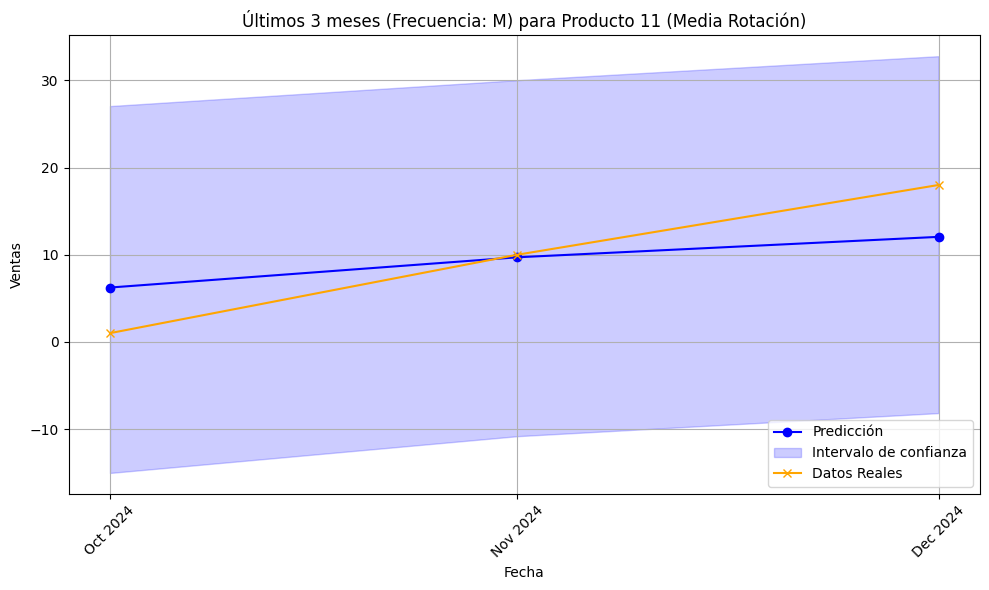

16:21:45 - cmdstanpy - INFO - Chain [1] start processing
16:21:45 - cmdstanpy - INFO - Chain [1] done processing


Procesando producto: 16 (Baja Rotación)


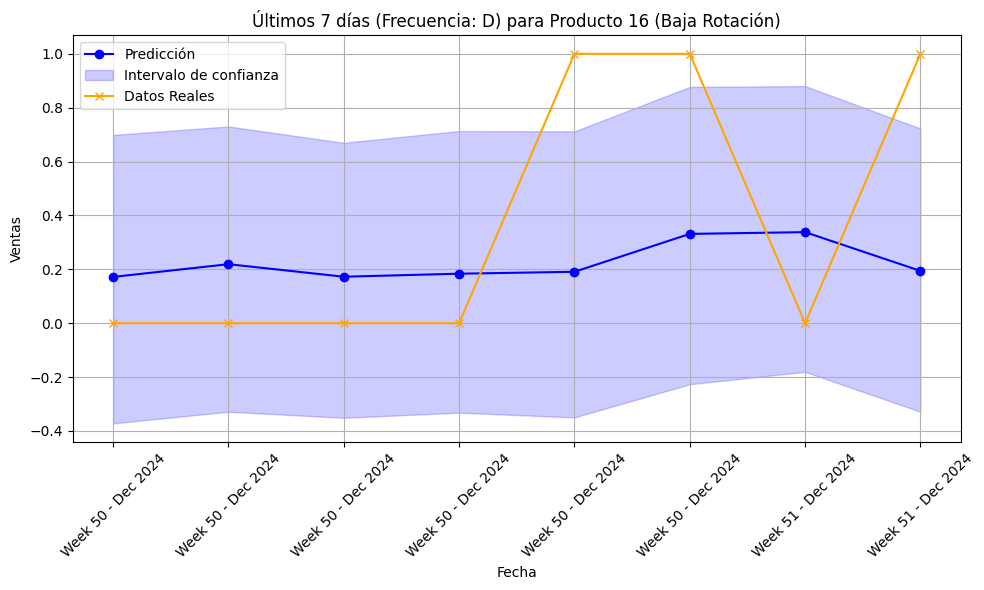

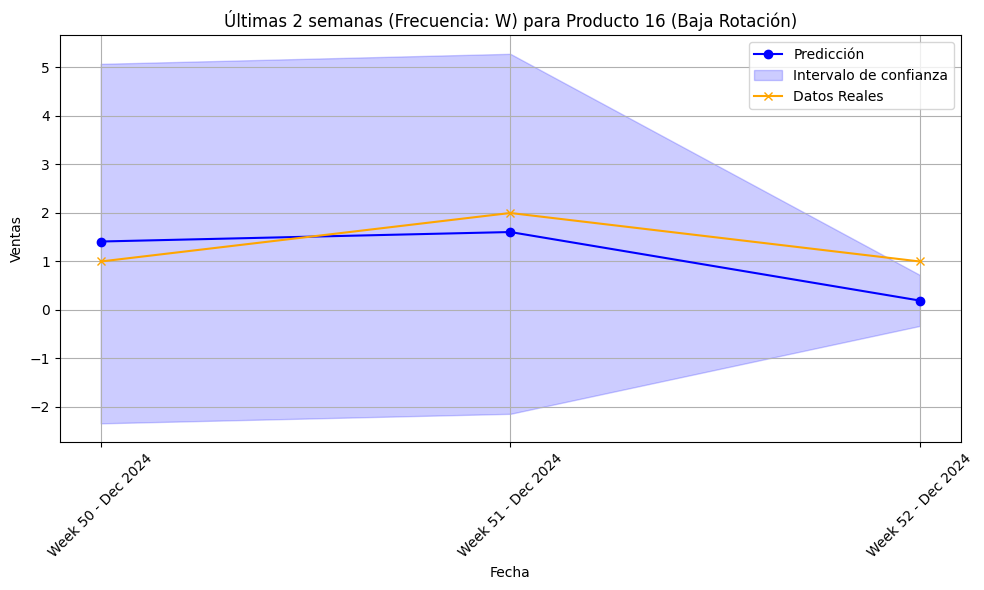

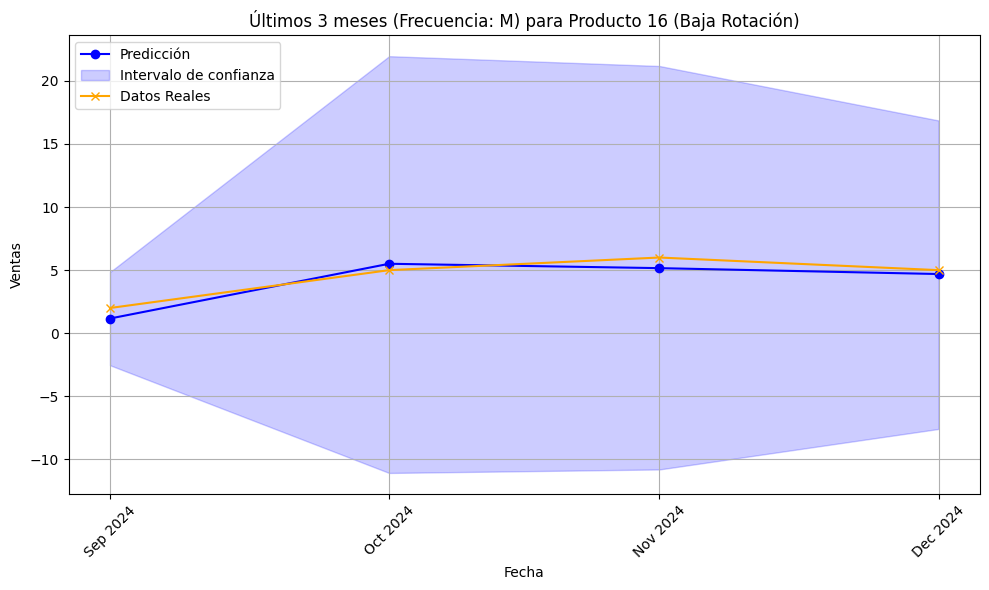

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# === Paso 1: Cargar datos ===
sales_data = pd.read_csv('sales_test.csv')

# Renombrar columnas si es necesario
sales_data.rename(columns={'date': 'ds', 'quantity': 'y'}, inplace=True)

# Convertir la columna 'ds' a formato datetime
sales_data['ds'] = pd.to_datetime(sales_data['ds'])

# Clasificar productos por rotación
product_totals = sales_data.groupby('product_id')['y'].sum().sort_values(ascending=False)
high_rotation = product_totals.head(1).index[0]
medium_rotation = product_totals.iloc[len(product_totals)//2:len(product_totals)//2+1].index[0]
low_rotation = product_totals.tail(1).index[0]

selected_products = {
    'Alta Rotación': high_rotation,
    'Media Rotación': medium_rotation,
    'Baja Rotación': low_rotation
}

# === Paso 2: Procesar los productos seleccionados ===
for category, product_id in selected_products.items():
    print(f"Procesando producto: {product_id} ({category})")
    product_data = sales_data[sales_data['product_id'] == product_id]
    
    # Agrupar diariamente para mayor granularidad
    daily_data = product_data.resample('D', on='ds').sum().reset_index()
    daily_data.dropna(subset=['y'], inplace=True)
    daily_data['y'] = pd.to_numeric(daily_data['y'], errors='coerce')  # Convertir 'y' a numérico
    
    # Entrenar Prophet
    model = Prophet()
    model.fit(daily_data)
    
    # Generar futuro extendido para todo el rango histórico
    future = model.make_future_dataframe(periods=0, freq='D')  # Solo histórico
    
    # Predicciones completas
    forecast = model.predict(future)
    forecast['yhat'] = pd.to_numeric(forecast['yhat'], errors='coerce')  # Convertir 'yhat' a numérico
    
    # Filtrar predicciones para los últimos horizontes específicos
    horizons = {
        'Últimos 7 días': 7,
        'Últimas 2 semanas': 14,
        'Últimos 3 meses': 90
    }
    
    for label, days in horizons.items():
        # Filtrar predicciones y datos reales
        filtered_forecast = forecast[forecast['ds'] >= (daily_data['ds'].max() - pd.Timedelta(days=days))]
        real_data = daily_data[daily_data['ds'] >= (daily_data['ds'].max() - pd.Timedelta(days=days))]
        
        # Seleccionar columnas relevantes y agrupar
        filtered_forecast = filtered_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
        real_data = real_data[['ds', 'y']]
        
        if label == 'Últimos 3 meses':
            freq = 'M'  # Mensual
        elif label == 'Últimas 2 semanas':
            freq = 'W'  # Semanal
        else:
            freq = 'D'  # Diario

        pred_grouped = filtered_forecast.resample(freq, on='ds').sum()
        real_grouped = real_data.resample(freq, on='ds').sum()
        
        # Visualizar evolución temporal con marcas ajustadas
        plt.figure(figsize=(10, 6))
        plt.plot(pred_grouped.index, pred_grouped['yhat'], label='Predicción', color='blue', marker='o')
        plt.fill_between(
            pred_grouped.index,
            pred_grouped['yhat_lower'],
            pred_grouped['yhat_upper'],
            color='blue',
            alpha=0.2,
            label='Intervalo de confianza'
        )
        plt.plot(real_grouped.index, real_grouped['y'], label='Datos Reales', color='orange', marker='x')
        
        # Ajustar eje X con etiquetas personalizadas
        plt.xticks(
            ticks=pred_grouped.index,
            labels=[date.strftime('%b %Y') if freq == 'M' else f"Week {date.strftime('%U')} - {date.strftime('%b %Y')}" for date in pred_grouped.index],
            rotation=45
        )
        
        plt.title(f"{label} (Frecuencia: {freq.upper()}) para Producto {product_id} ({category})")
        plt.xlabel('Fecha')
        plt.ylabel('Ventas')
        plt.legend()
        plt.grid()
        plt.tight_layout()
        plt.show()



### SARIMA (mensual)

/home/rebooter/code/Final_Proyect/script_datos_sintéticos_ira/AI_discount_recommendation_based_on_expiration_date/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/rebooter/code/Final_Proyect/script_datos_sintéticos_ira/AI_discount_recommendation_based_on_expiration_date/env/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Mean Squared Error (MSE): 63.73713409827198
R-Squared (R²): 0.986871556577918


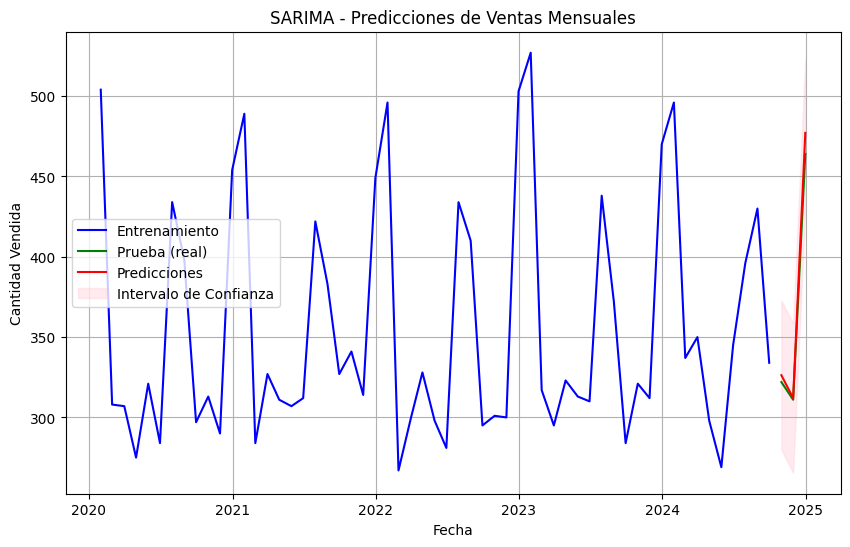

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# === Paso 1: Preparar los Datos ===
# Cargar los datos
sales_data = pd.read_csv('sales_test.csv')

# Convertir la columna 'date' a formato datetime
sales_data['date'] = pd.to_datetime(sales_data['date'])

# Agrupar los datos por mes y sumar las ventas
monthly_sales = sales_data.groupby(pd.Grouper(key='date', freq='M')).sum()['quantity']

# === Paso 2: Dividir los Datos ===
# Usar los últimos 3 meses para prueba
train = monthly_sales[:-3]
test = monthly_sales[-3:]

# === Paso 3: Ajustar el Modelo SARIMA ===
# Ajustar el modelo (configuración inicial SARIMA(1, 1, 1)(1, 1, 1, 12))
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = model.fit(disp=False)

# === Paso 4: Realizar Predicciones ===
# Predicciones para el período de prueba
pred = sarima_fit.get_forecast(steps=len(test))
pred_ci = pred.conf_int()

# === Paso 5: Evaluar el Modelo ===
# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(test, pred.predicted_mean)
print(f"Mean Squared Error (MSE): {mse}")
r2 = r2_score(test, pred.predicted_mean)
print(f"R-Squared (R²): {r2}")


# === Paso 6: Visualizar Resultados ===
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Entrenamiento', color='blue')
plt.plot(test.index, test, label='Prueba (real)', color='green')
plt.plot(test.index, pred.predicted_mean, label='Predicciones', color='red')
plt.fill_between(test.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='pink', alpha=0.3, label='Intervalo de Confianza')
plt.title('SARIMA - Predicciones de Ventas Mensuales')
plt.xlabel('Fecha')
plt.ylabel('Cantidad Vendida')
plt.legend()
plt.grid()
plt.show()


## Correcciones de prophet para adaptarlo a nuestro caso Y entrenarlo en las mismas características que nuestro modelo

16:21:47 - cmdstanpy - INFO - Chain [1] start processing
16:21:50 - cmdstanpy - INFO - Chain [1] done processing


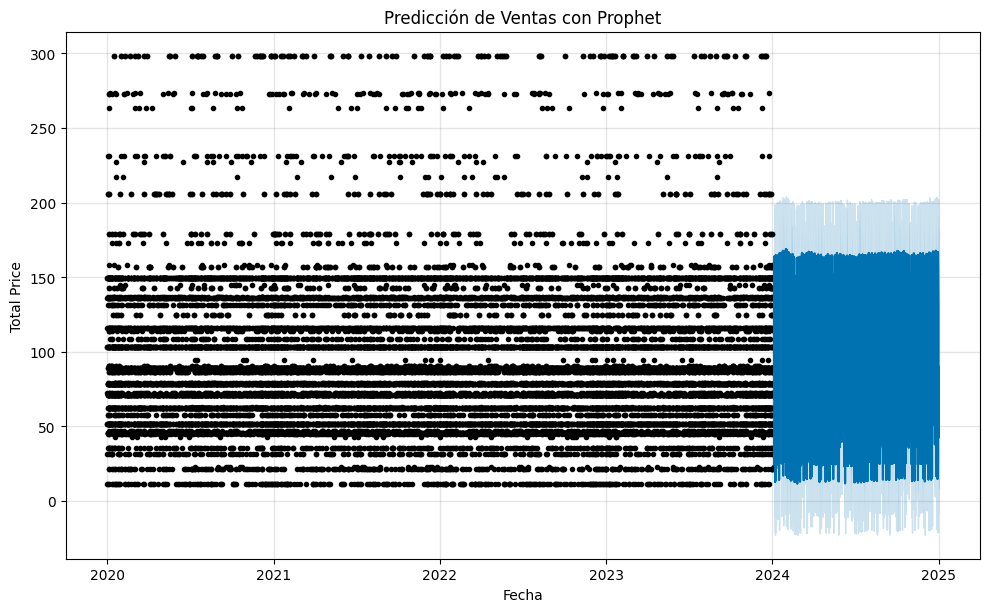

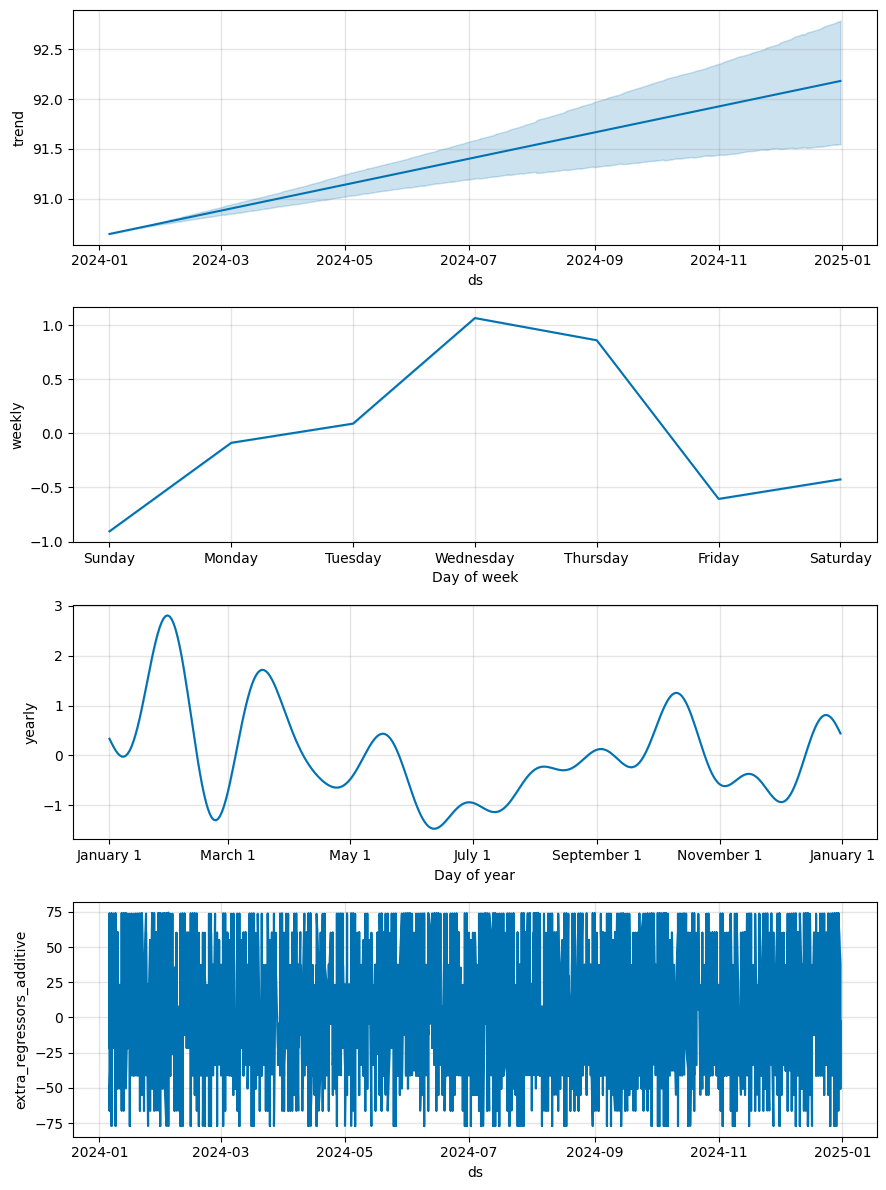

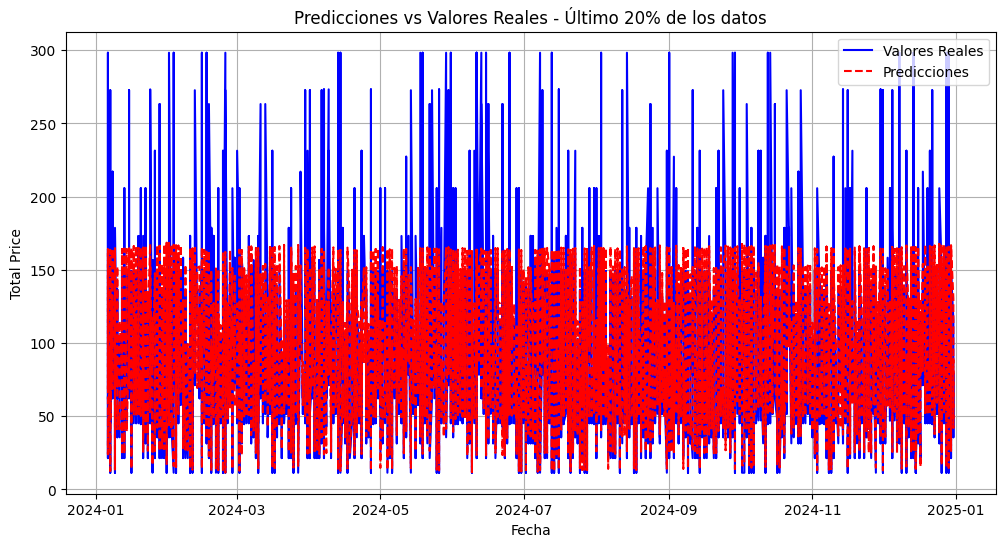

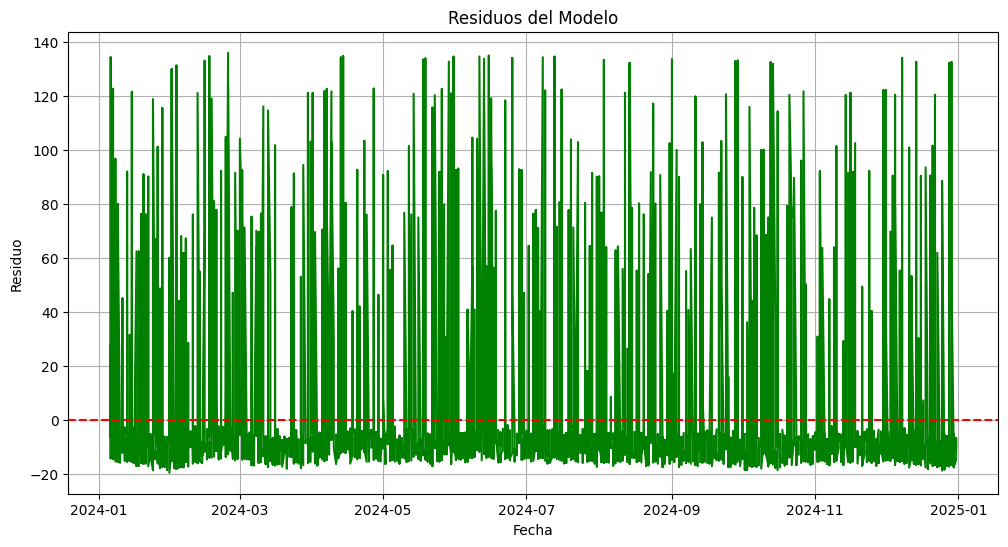


Evaluación del Modelo Prophet:
Mean Squared Error (MSE): 765.71
R-Squared (R²): 0.6659


KeyError: 'price_usd_effect'

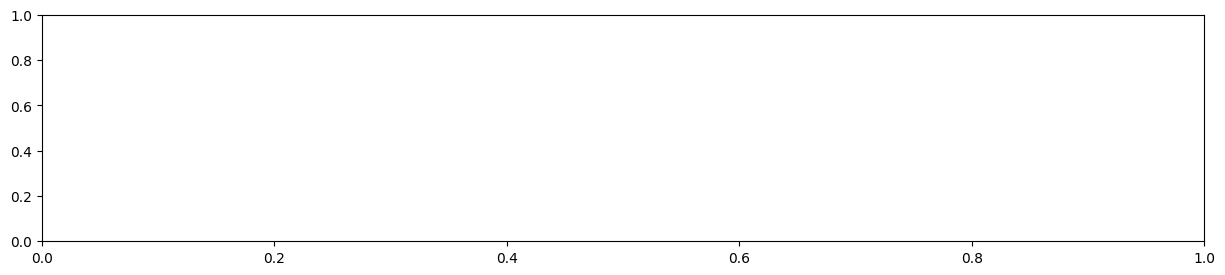

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# === Paso 1: Cargar y Preparar Datos ===
data = pd.merge(sales, products, on='product_id', how='left')
data = pd.merge(data, stock, on='product_id', how='left')

# Crear características adicionales
data['Days to Expire'] = (pd.to_datetime(data['batch_expiry_date']) - pd.to_datetime(data['date'])).dt.days
data['Total Revenue'] = data['total_price']
data['Price_USD'] = data['Price_USD']
data['Remaining stock'] = data['remaining_stock']

# === Paso 2: Preparar Datos para Prophet ===
df_prophet = pd.DataFrame({
    'ds': pd.to_datetime(data['date']),
    'y': data['total_price'],
    'price_usd': data['Price_USD'],
    'remaining_stock': data['remaining_stock'],
    'days_to_expire': data['Days to Expire']
})

# === Paso 3: Dividir los Datos ===
train_size = int(len(df_prophet) * 0.8)
train = df_prophet.iloc[:train_size]
test = df_prophet.iloc[train_size:]

# === Paso 4: Crear y Entrenar el Modelo Prophet ===
model = Prophet(
    weekly_seasonality=True,
    daily_seasonality=False,
    yearly_seasonality=True
)

# Agregar los regresores adicionales
model.add_regressor('price_usd')
model.add_regressor('remaining_stock')
model.add_regressor('days_to_expire')

# Ajustar el modelo
model.fit(train)

# === Paso 5: Generar Predicciones ===
future = pd.DataFrame({
    'ds': test['ds'],
    'price_usd': test['price_usd'],
    'remaining_stock': test['remaining_stock'],
    'days_to_expire': test['days_to_expire']
})
forecast = model.predict(future)

# === Paso 6: Visualizar Resultados ===
# Gráfico 1: Predicciones de Prophet
fig1 = model.plot(forecast)
plt.title('Predicción de Ventas con Prophet')
plt.xlabel('Fecha')
plt.ylabel('Total Price')
plt.show()

# Gráfico 2: Componentes
fig2 = model.plot_components(forecast)
plt.show()

# Gráfico 3: Predicciones vs Reales (últimos 20% de los datos)
plt.figure(figsize=(12, 6))
plt.plot(test['ds'], test['y'], label='Valores Reales', color='blue')
plt.plot(test['ds'], forecast['yhat'], label='Predicciones', color='red', linestyle='--')
plt.title('Predicciones vs Valores Reales - Último 20% de los datos')
plt.xlabel('Fecha')
plt.ylabel('Total Price')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico 4: Residuos
residuals = test['y'].values - forecast['yhat'].values
plt.figure(figsize=(12, 6))
plt.plot(test['ds'], residuals, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuos del Modelo')
plt.xlabel('Fecha')
plt.ylabel('Residuo')
plt.grid(True)
plt.show()

# === Paso 7: Evaluar el Modelo ===
y_true = test['y'].values
y_pred = forecast['yhat'].values

# Calcular métricas
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print("\nEvaluación del Modelo Prophet:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-Squared (R²): {r2:.4f}")

# === Paso 8: Análisis de Importancia de Variables ===
plt.figure(figsize=(15, 10))
for i, reg in enumerate(['price_usd', 'remaining_stock', 'days_to_expire']):
    plt.subplot(3, 1, i+1)
    plt.plot(forecast['ds'], forecast[f'{reg}_effect'])
    plt.title(f'Efecto de {reg}')
    plt.xlabel('Fecha')
    plt.ylabel('Efecto')
plt.tight_layout()
plt.show()